# <span style="color:#f37726">02 RKI Data Exploration</span>

**Ziele des Notebooks:**
- Fallzahlenentwicklung zeitlich und räumlich analysieren
- Impffortschritt und Krankheitsverlauf gegenüberstellen
- Visualisierungen erstellen und exportieren
- Ansätze für Kausalitäten finden

In [1]:
# Benötigte Bibliotheken für dieses Notebook
import geopandas # ggf. weitere Bibliotheken für die Installation notwendig
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Zeitliche Entwicklung der Fallzahlen

In [2]:
# Laden der Datensätze als pandas DataFrame
df = pd.read_pickle('data/fallzahlen_akkumuliert.pkl')
landkreise_df = pd.read_pickle('data/landkreise_bundesland_id.pkl')
case_dates_df = pd.read_pickle('data/case_dates.pkl')
vaccines_df = pd.read_pickle('data/vaccine_count.pkl')

**Bundesrepublik**

In [3]:
daily_cases_df = df.groupby(['Meldedatum']).sum()
display(daily_cases_df)

,AnzahlFall,AnzahlTodesfall,AnzahlGenesen
Meldedatum,,,
2020-03-01,36,0,36
2020-03-02,40,0,40
2020-03-03,85,0,85
2020-03-04,156,2,154
2020-03-05,186,1,185
...,...,...,...
2021-03-27,15781,104,10563
2021-03-28,7622,49,4928
2021-03-29,11034,97,6907


<IPython.core.display.Javascript object>


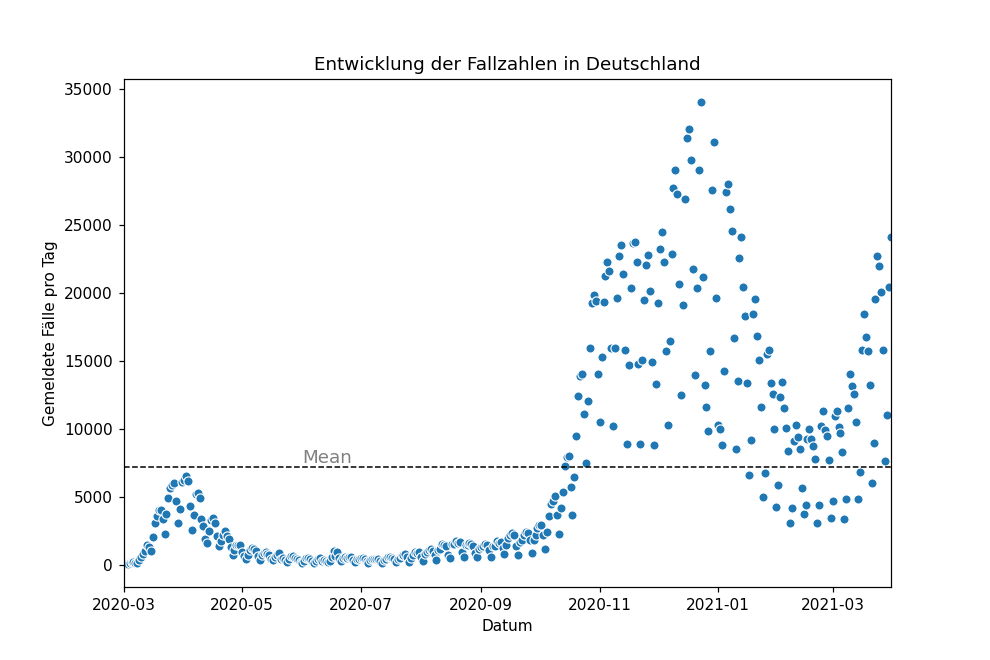

<IPython.core.display.Javascript object>


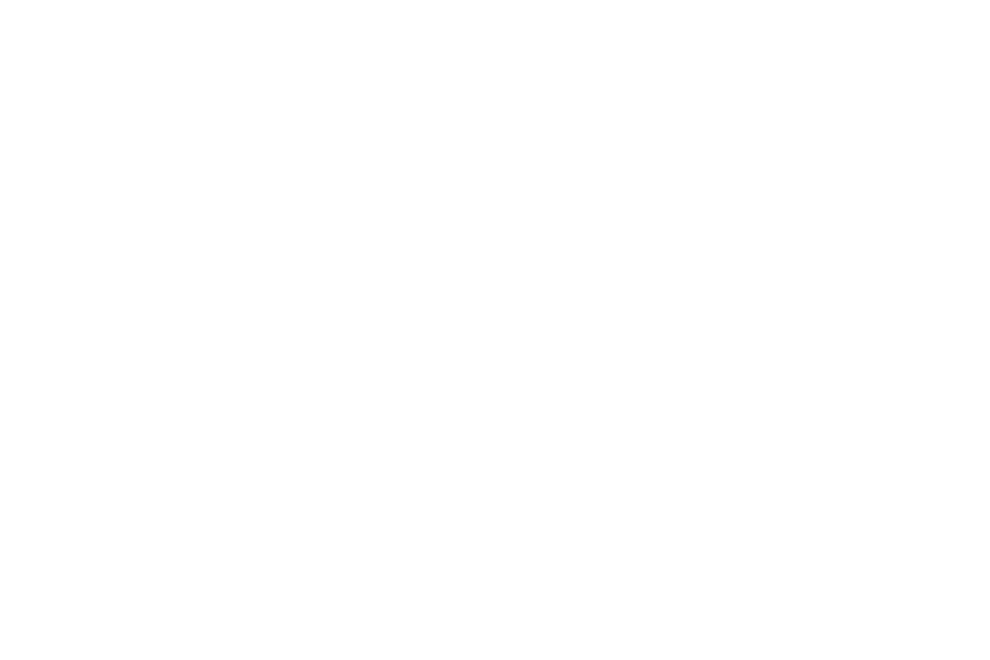

In [23]:
%matplotlib notebook

# Daten
Xplot = daily_cases_df.index 
yplot = daily_cases_df['AnzahlFall']

# Scatter Plot
f, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=Xplot, y=yplot)
ax.set_xlabel('Datum')
ax.set_ylabel('Gemeldete Fälle pro Tag')
ax.set_xlim(Xplot[0], Xplot[-1])
plt.axhline(yplot.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(pd.Timestamp('2020-06'), yplot.mean()+300, 'Mean', fontsize=12, c='grey')
plt.title("Entwicklung der Fallzahlen in Deutschland")
plt.savefig("visualization/bund_time_cases_scatterplot.svg")
plt.show()

# Line Plot
f, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(x=Xplot, y=yplot)
ax.set_xlabel('Datum')
ax.set_ylabel('Gemeldete Fälle pro Tag')
ax.set_xlim(Xplot[0], Xplot[-1])
plt.axhline(yplot.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(pd.Timestamp('2020-06'), yplot.mean()+300, 'Mean', fontsize=12, c='grey')
plt.title("Entwicklung der Fallzahlen in Deutschland")
plt.savefig("visualization/bund_time_cases_lineplot.svg")
plt.close() # Wird erst im nächsten Notebook benötigt

Dargestellt sind die täglichen Fallmeldungen in allen Landkreisen vom März 2020 bis März 2021. Durchschnittlich wurden in diesem Zeitraum 7179 Fälle pro Tag gemeldet. Politik, Wissenschaft und Medien sprachen oft von sogenannten 'Wellen' um das Infektionsgeschehen zu beschreiben. In der Graphik lassen sich drei solcher Anstiege identifizieren. Dabei ist zu beachten, dass die Testkapazitäten erst im Verlauf der Pandemie ausgebaut wurden. Eine Verzerrung der Fallzahlen nach unten ist in den frühen Phasen der Pandemie anzunehmen. 

**Bundesland** (Sachsen-Anhalt)

In [24]:
sa_df = landkreise_df[landkreise_df['Bundesland'] == 'Sachsen-Anhalt']
display(sa_df)

,Landkreis,Bundesland,IstStadt,Fläche_qkm,Bevölkerung
IdLandkreis,,,,,
15001,Dessau-Roßlau,Sachsen-Anhalt,True,244.71,80103
15002,Halle,Sachsen-Anhalt,True,135.03,238762
15003,Magdeburg,Sachsen-Anhalt,True,201.01,237565
15081,Altmarkkreis Salzwedel,Sachsen-Anhalt,False,2293.74,83173
15082,Anhalt-Bitterfeld,Sachsen-Anhalt,False,1453.84,158486
15083,Börde,Sachsen-Anhalt,False,2366.99,170923
15084,Burgenlandkreis,Sachsen-Anhalt,False,1413.95,178846
15085,Harz,Sachsen-Anhalt,False,2104.75,213310
15086,Jerichower Land,Sachsen-Anhalt,False,1577.08,89589


<IPython.core.display.Javascript object>


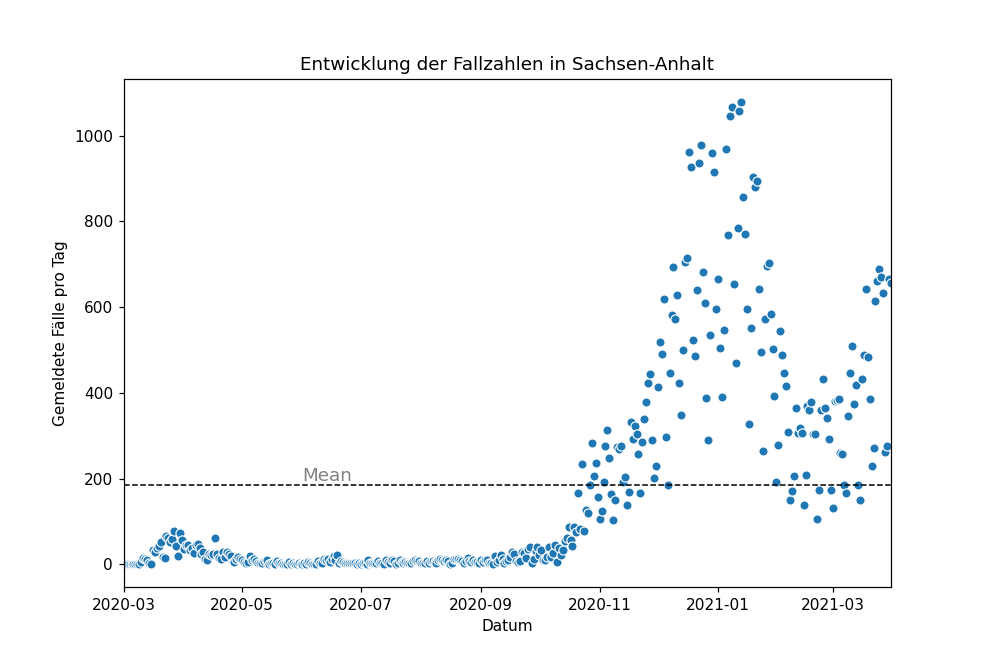

In [25]:
%matplotlib notebook

# Vorbereitung
sa_cases_df = df.loc[sa_df.index]
sa_daily_cases_df = sa_cases_df.groupby(['Meldedatum']).sum()

# Daten
Xplot = sa_daily_cases_df.index 
yplot = sa_daily_cases_df['AnzahlFall']

# Scatter Plot
f, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=Xplot, y=yplot)
ax.set_xlabel('Datum')
ax.set_ylabel('Gemeldete Fälle pro Tag')
ax.set_xlim(Xplot[0], Xplot[-1])
plt.axhline(yplot.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(pd.Timestamp('2020-06'), yplot.mean()+10, 'Mean', fontsize=12, c='grey')
plt.title("Entwicklung der Fallzahlen in Sachsen-Anhalt")
plt.savefig("visualization/sachsenanhalt_time_cases_scatterplot.svg")
plt.show()

Der Verlauf in den Landkreisen Sachsen-Anhalts ähnelt dem bundesweiten Trend. Erwähnenswert sind die geringeren Fallzahlen während der 1. Welle.

**Landkreis** (Anhalt-Bitterfeld)

<IPython.core.display.Javascript object>


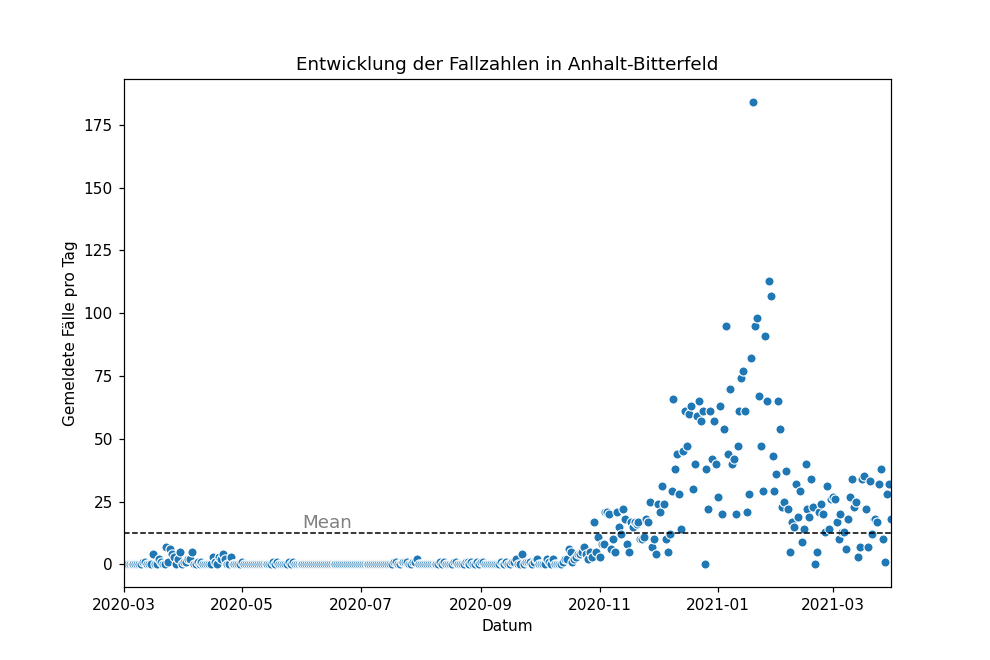

In [26]:
%matplotlib notebook

# Vorbereitung
ab_id = sa_df.index[sa_df['Landkreis'] == 'Anhalt-Bitterfeld']
ab_cases_df = df.loc[ab_id]
ab_daily_cases_df = ab_cases_df.groupby(['Meldedatum']).sum()

# Daten
Xplot = ab_daily_cases_df.index 
yplot = ab_daily_cases_df['AnzahlFall']

# Scatter Plot
f, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=Xplot, y=yplot)
ax.set_xlabel('Datum')
ax.set_ylabel('Gemeldete Fälle pro Tag')
ax.set_xlim(Xplot[0], Xplot[-1])
plt.axhline(yplot.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(pd.Timestamp('2020-06'), yplot.mean()+2, 'Mean', fontsize=12, c='grey')
plt.title("Entwicklung der Fallzahlen in Anhalt-Bitterfeld")
plt.savefig("visualization/anhaltbitterfeld_time_cases_scatterplot.svg")
plt.show()

Im Ranking des [Zukunftsatlas 2019](https://www.handelsblatt.com/politik/deutschland/zukunftsatlas-2019/) erreicht der Landkreis Anhalt-Bitterfeld Platz 381 von 401. Prägend seien fehlende berufliche Perspektiven, eine überalterte Gesellschaft und Lücken in der Infrastruktur. Im Kontext von Pandemien wird gelegentlich angenommen, dass ländliche Regionen aufgrund ihrer geringeren Bevölkerungsdichte weniger stark betroffen sind als urbane Räume. Dies bestätigt sich in der Graphik ansatzweise.

## Saisoneffekte und weitere zeitliche Einflussgrößen

In [8]:
daily_cases_df = pd.concat([daily_cases_df, case_dates_df], axis=1)

**Monate**

In [9]:
# März 2020 auslassen, damit genau 1 Jahr
daily_cases_oneyear_df = daily_cases_df[(daily_cases_df.index > '2020-03-31')]

# Gruppieren nach Monaten
monthly_cases_series = daily_cases_oneyear_df.groupby(by='Monat')['AnzahlFall'].sum()
print(monthly_cases_series)

Monat
1     467457
2     224534
3     394973
4      88274
5      19785
6      12908
7      15146
8      34465
9      49288
10    252821
11    529300
12    679998
Name: AnzahlFall, dtype: int64


<IPython.core.display.Javascript object>


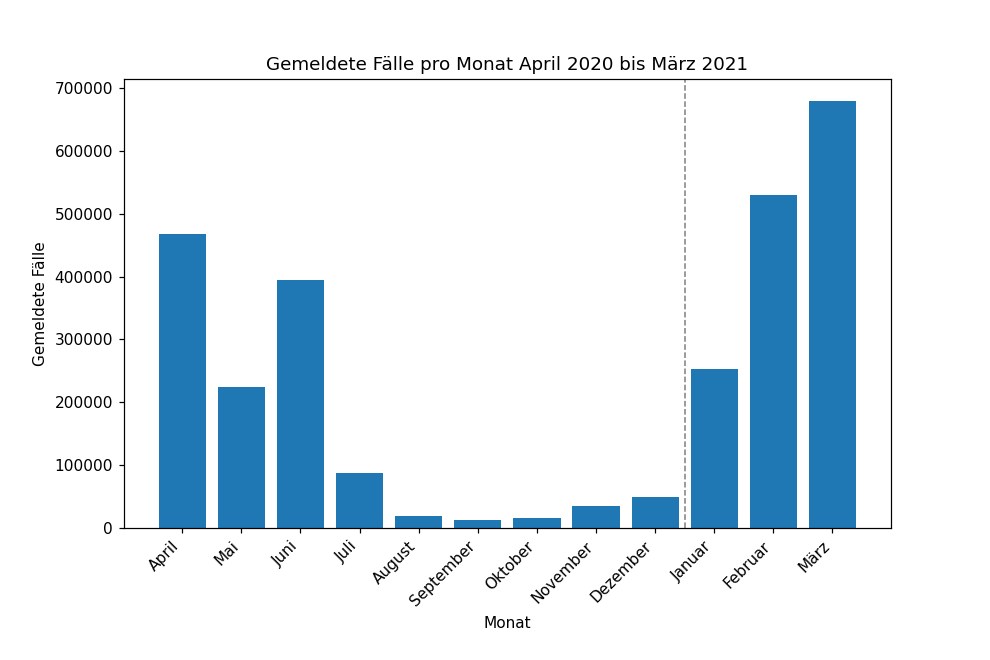

In [27]:
%matplotlib notebook

# Daten
Xplot = monthly_cases_series.index
yplot = monthly_cases_series.values

# Bar Blot
fig, ax = plt.subplots(figsize=(9, 6))
fig.autofmt_xdate()
plt.xlabel("Monat")
plt.ylabel("Gemeldete Fälle")
plt.bar(Xplot, yplot)
plt.axvline(9.5, color='grey', linestyle='dashed', linewidth=1)
plt.xticks(Xplot)
ax.set_xticklabels(['April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember', 'Januar', 'Februar', 'März'], rotation = 45)
plt.title("Gemeldete Fälle pro Monat April 2020 bis März 2021")
plt.savefig("visualization/monthly_cases.svg")
plt.show()

Während den Sommer- und Herbstmonaten 2020 erreichten die Fallzahlen einen Tiefstand. Unter Anderem wurde in diesem Kontext über mögliche Verbindungen zu Wetter, Urlaub (also Mobilität) und Zeit im Freien präsumiert. Inwiefern es sich bei diesem Phänomen um einen tatsächlichen (kausalen) Saisoneffekt handelt bleibt unklar. Ein Vergleich mit ähnlichen Entwicklung im Jahr 2021 könnte Aufschluss bringen. Jedoch müsste dabei für weitere Faktoren, wie z.B. den Impffortschritt oder die veränderte öffentliche Warnehmung der Pandemie, kontrolliert werden.

**Wochentage**

In [11]:
# die ersten 4 Tage auslassen, damit alle Wochentage gleiche Häufigkeit
weekday_cases_df = daily_cases_df[(daily_cases_df.index > '2020-03-04')]

# Gruppieren nach Wochentag
weekday_cases_series = daily_cases_df.groupby(by='Wochentag')['AnzahlFall'].sum()
print(weekday_cases_series)

Wochentag
0    306452
1    489443
2    558118
3    498210
4    451224
5    341702
6    197777
Name: AnzahlFall, dtype: int64


<IPython.core.display.Javascript object>


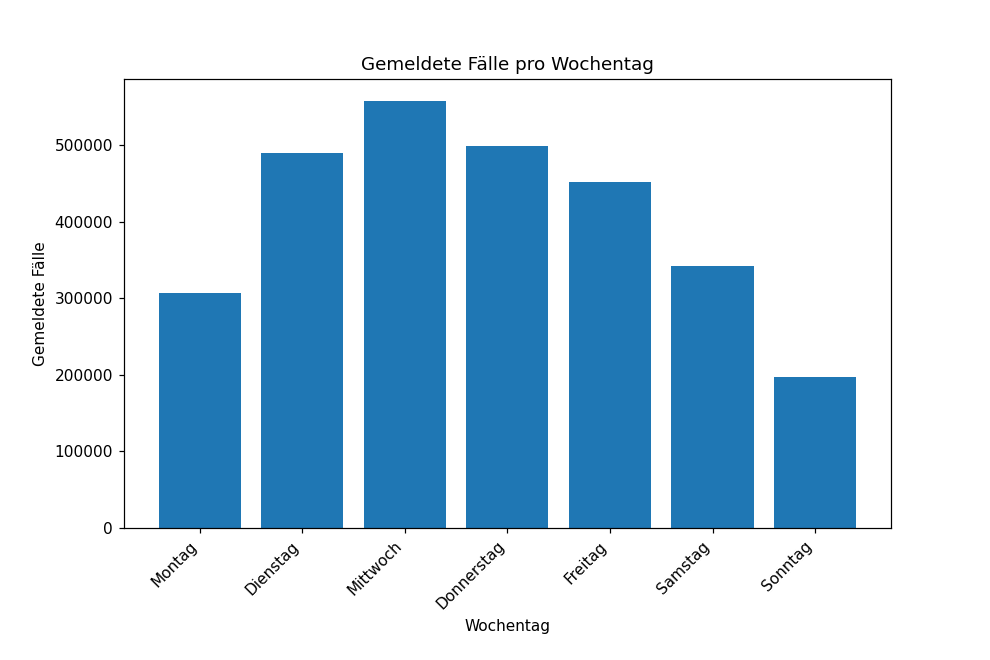

In [28]:
%matplotlib notebook

# Daten
Xplot = weekday_cases_series.index
yplot = weekday_cases_series.values

# Bar Blot
fig, ax = plt.subplots(figsize=(9, 6))
fig.autofmt_xdate()
plt.xlabel("Wochentag")
plt.ylabel("Gemeldete Fälle")
plt.bar(Xplot, yplot)
plt.xticks(Xplot)
ax.set_xticklabels(['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'], rotation = 45)
plt.title("Gemeldete Fälle pro Wochentag")
plt.savefig("visualization/weekday_cases.svg")
plt.show()

Die Fallzahlen innerhalb einer Woche schwanken teils stark. Während mittwochs oft neue Höchststände gemeldet werden, halbieren sich die Zahlen zum Wochenende. Ursache dessen ist die unterschiedliche Meldeweise der Gesundheitsämter in den 401 Landkreisen. Das Robert Koch-Institut sitzt am Ende der Meldekette und kann keinen Einfluss auf die vorgelagerten Arbeitsschritte nehmen. So kommt es vor, dass manche Ämter sonntags keine Fälle melden, andere jedoch schon. Zudem haben Testzentren und Auswertungslabore individuelle Öffnungszeiten.

## Räumlicher Vergleich

**Fälle pro Bundesland**

In [13]:
# Totale Fallzahlen pro Landkreis
total_landkreis_df = df.groupby(level=[0]).sum()

# Bundesland eränzen
total_landkreis_bundesland_df = pd.concat([total_landkreis_df, landkreise_df], axis=1)

# Summe der Fallzahlen pro Bundesland
bundeslands_fall_df = total_landkreis_bundesland_df.groupby(by='Bundesland')[['AnzahlFall', 'Bevölkerung']].sum()
bundeslands_fall_df = bundeslands_fall_df.astype({'Bevölkerung': 'int64'})

# Fälle pro Einwohner ergänzen
bundeslands_fall_df['Fälle_pro_Einwohner'] = bundeslands_fall_df['AnzahlFall']/bundeslands_fall_df['Bevölkerung']
bundeslands_fall_df.sort_values(by='Fälle_pro_Einwohner', inplace=True, ascending=False)

display(bundeslands_fall_df)

,AnzahlFall,Bevölkerung,Fälle_pro_Einwohner
Bundesland,,,
Sachsen,223617,4071971,0.054916
Thüringen,95477,2133378,0.044754
Berlin,147107,3669491,0.040089
Bayern,501711,13124737,0.038226
Brandenburg,88525,2521893,0.035103
Hessen,220492,6288080,0.035065
Nordrhein-Westfalen,614710,17947221,0.034251
Sachsen-Anhalt,73460,2194782,0.033470
Hamburg,61824,1847253,0.033468


Weder die Bevölkerungsdichte (Stadtstaaten vs. dünnbesiedelte Bundesländer), noch die geographische Lage (Neue vs. Alte Bundesländer, Nord vs. Süd) suggeriert ein markantes Muster in den durchschnittlichen Fällen pro Einwohner.

**Fälle nach Landkreisart (Stadt vs. Land)**

In [14]:
# Summe der Fallzahlen Stadt vs Land
urban_fall_df = total_landkreis_bundesland_df.groupby(by='IstStadt')[['AnzahlFall', 'Bevölkerung']].sum()
urban_fall_df = urban_fall_df.astype({'Bevölkerung': 'int64'})
urban_fall_df['Fälle_pro_Einwohner'] = urban_fall_df['AnzahlFall']/urban_fall_df['Bevölkerung']
print(urban_fall_df)

          AnzahlFall  Bevölkerung  Fälle_pro_Einwohner
IstStadt                                              
False        1881843     56224329             0.033470
True          961083     26942382             0.035672


<IPython.core.display.Javascript object>


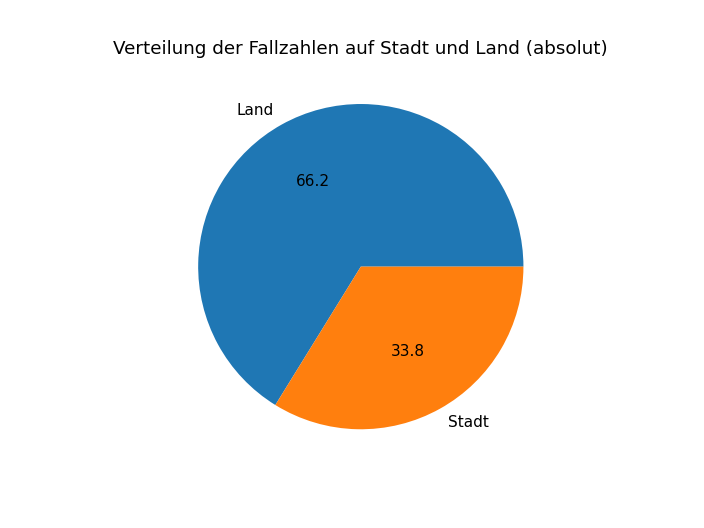

In [29]:
%matplotlib notebook

# Daten
yplot = urban_fall_df['AnzahlFall']

# Pie Plot
plt.pie(yplot, labels=['Land', 'Stadt'], autopct='%.1f')
plt.title("Verteilung der Fallzahlen auf Stadt und Land (absolut)")
plt.savefig("visualization/stadt_land_pieplot_absolut.svg")
plt.show()

Ungefähr 2/3 der Fälle wurden in Landkreisen gemeldet, welche nicht als kreisfreie Stadt gelten. Bezieht man die Verteilung der Bevölkerung auf die Kreise mit ein, relativiert sich dieses Phänomen. So lebten 2019 beinahe 27 Millionen Menschen in kreisfreien Städten. Dies entspricht einem Anteil von circa 32.4%:

<IPython.core.display.Javascript object>


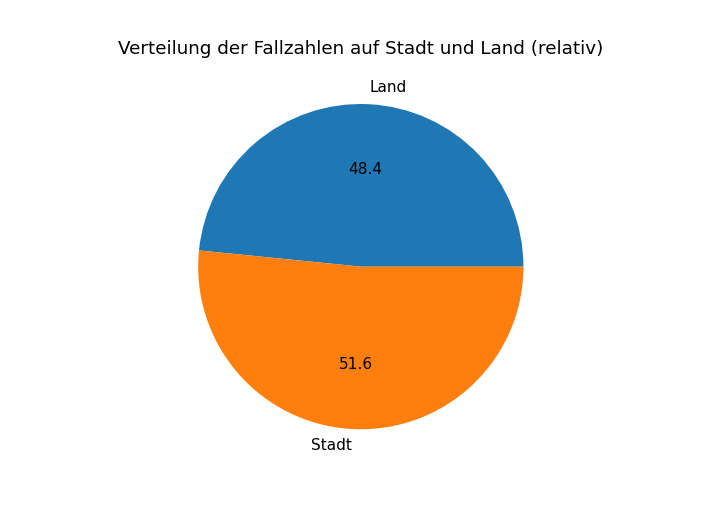

In [30]:
%matplotlib notebook

# Daten
yplot = urban_fall_df['Fälle_pro_Einwohner']
yplot = yplot/np.sum(yplot)

# Pie Plot
plt.pie(yplot, labels=['Land', 'Stadt'], autopct='%.1f')
plt.title("Verteilung der Fallzahlen auf Stadt und Land (relativ)")
plt.savefig("visualization/stadt_land_pieplot_relativ.svg")
plt.show()

Eine gewisse Tendenz scheint bei Kontrolle für die Einwohnerzahl jedoch bestehen zu bleiben. Die Beobachtung, dass urbane Räume höhere Fallzahlen haben, deckt sich auch mit der allgemeinen Intuition. Anzuzweifeln bleibt die statistische Signifikanz des Unterschiedes. Eine Verwendung des Einflusses im Vorhersagemodell ist jedoch möglich, da keine Kausalität existieren muss.

## Impfungen, Todesfälle und Genesungen

In [17]:
short_vaccines_df = vaccines_df[(vaccines_df.index < '2021-04-01')] # Zeitlichen Horizont anpassen
daily_cases_vaccines_df = pd.concat([daily_cases_df, short_vaccines_df], axis=1)
daily_cases_vaccines_df.fillna(0, inplace=True)
daily_cases_vaccines_df['cum_AnzahlFall']=daily_cases_vaccines_df['AnzahlFall'].cumsum()
daily_cases_vaccines_df['cum_AnzahlTodesfall']=daily_cases_vaccines_df['AnzahlTodesfall'].cumsum()

display(daily_cases_vaccines_df)

,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Monat,Wochentag,Jahr,impf_quote_erst,impf_quote_voll,cum_AnzahlFall,cum_AnzahlTodesfall
Meldedatum,,,,,,,,,,
2020-03-01,36,0,36,3,6,2020,0.000,0.000,36,0
2020-03-02,40,0,40,3,0,2020,0.000,0.000,76,0
2020-03-03,85,0,85,3,1,2020,0.000,0.000,161,0
2020-03-04,156,2,154,3,2,2020,0.000,0.000,317,2
2020-03-05,186,1,185,3,3,2020,0.000,0.000,503,3
...,...,...,...,...,...,...,...,...,...,...
2021-03-27,15781,104,10563,3,5,2021,0.110,0.047,2779771,78187
2021-03-28,7622,49,4928,3,6,2021,0.111,0.047,2787393,78236
2021-03-29,11034,97,6907,3,0,2021,0.114,0.049,2798427,78333


<IPython.core.display.Javascript object>


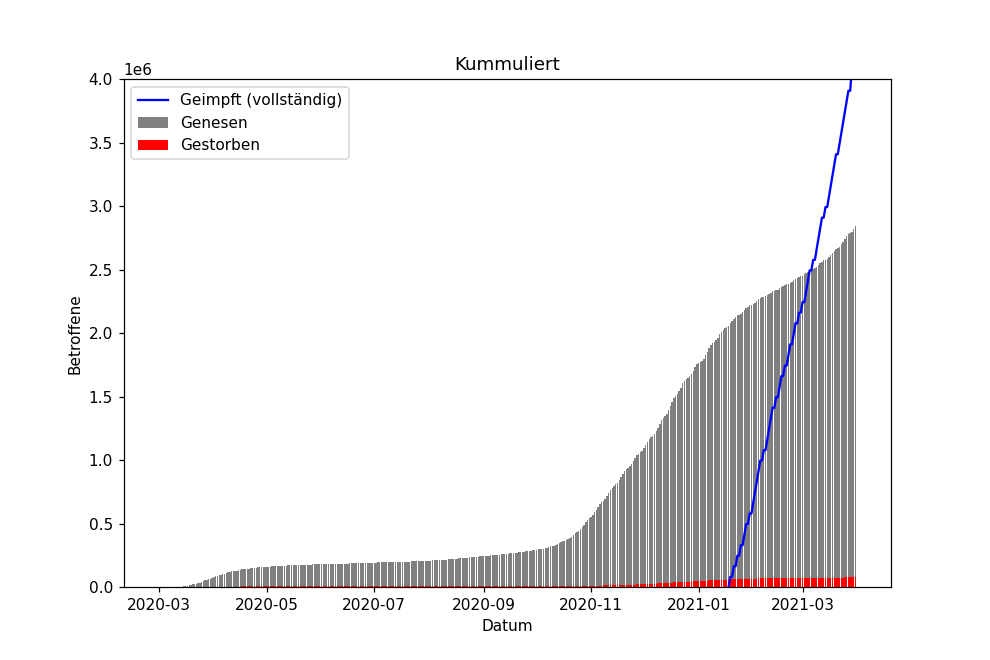

In [31]:
%matplotlib notebook

# Daten
pop_DE = 83157201 # Bevölkerungsstand am 31.03.2020 Quelle: Statistisches Bundesamt
Xplot = daily_cases_vaccines_df.index
aplot = daily_cases_vaccines_df['cum_AnzahlFall']
bplot = daily_cases_vaccines_df['cum_AnzahlTodesfall']
cplot = daily_cases_vaccines_df['impf_quote_voll']*pop_DE # nur vollständig Geimpfte
cplot = cplot[(cplot.index > '2021-01-17')] # Datum der ersten Impfungen

# Bar Plot
fig, ax = plt.subplots(figsize=(9, 6))
plt.xlabel("Datum")
plt.ylabel("Betroffene")
plt.bar(Xplot, aplot, color="grey")
plt.bar(Xplot, bplot, color="red")

# Scatter Plot
plt.plot(cplot, color='blue')
ax.set_ylim([0,4000000])
ax.legend(('Geimpft (vollständig)', 'Genesen', 'Gestorben'))
plt.title("Kummuliert")
plt.savefig("visualization/cum_cases_vaccines.svg")
plt.show()

Dargestellt ist die täglich akkumulierte Anzahl an Genesenen, Gestorbenen und vollständig Geimpften bis zum 31. März 2021. Die Relationen der Gruppen zueinander, sowie der lineare / leicht exponentielle Impffortschritt werden deutlich. In den Medien wurde im Kontext von einem [schleppenden Impfstart](https://www.tagesschau.de/inland/kritik-bundesregierung-impfstoff-101.html) berichtet. Die Daten bestätigen das in diesem Ausmaß nicht.

## Geotemporale Analyse

Für die Veranschaulichung des Pandemieverlaufs soll eine Karte der 401 Landkreise erstellt werden. [GeoPandas](https://geopandas.org/) ermöglicht dies mithilfe verschiedener Geodatentypen. Die enstprechenden Kreisgrenzen werden vom Bundesamt für Kartographie und Geodäsie [veröffentlicht](https://gdz.bkg.bund.de/index.php/default/open-data.html). Wir verwenden nachfolgend das Shapefile-Format:

In [19]:
# Laden der Daten als GeoDataframe
landkreise_geo_df = geopandas.read_file('data/kreisgrenzen/KRS_ew_19.shp')
landkreise_geo_df['AGS'] = landkreise_geo_df['AGS'].astype('int32')
landkreise_geo_df.set_index('AGS', inplace=True, drop=True)
display(landkreise_geo_df.head())

,OBJECTID,GEN,BEZ,IBZ,BEM,SN_L,SN_R,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,WSK,EWZ,KFL,SHAPE_Leng,SHAPE_Area,geometry
AGS,,,,,,,,,,,,,,,,,,,
1001,1,Flensburg,Kreisfreie Stadt,40,--,01,0,01,00,00,000,R,DEF01,2008-01-01,90164.0,53.02,74385.543733,1.478729e+08,"POLYGON ((1047812.976 7327520.138, 1047870.613..."
1002,2,Kiel,Kreisfreie Stadt,40,--,01,0,02,00,00,000,R,DEF02,2006-01-01,246794.0,118.65,178716.655300,3.295560e+08,"POLYGON ((1132025.511 7252280.912, 1132071.476..."
1003,3,Lübeck,Kreisfreie Stadt,40,--,01,0,03,00,00,000,R,DEF03,2006-02-01,216530.0,214.19,248091.033136,6.077048e+08,"POLYGON ((1210803.734 7167763.774, 1211026.580..."
1004,4,Neumünster,Kreisfreie Stadt,40,--,01,0,04,00,00,000,R,DEF04,1970-04-26,80196.0,71.66,92559.819300,2.084287e+08,"POLYGON ((1112687.973 7198562.476, 1112875.749..."
1051,5,Dithmarschen,Kreis,42,--,01,0,51,00,00,000,R,DEF05,2011-08-01,133193.0,1428.18,427767.022025,4.152028e+09,"MULTIPOLYGON (((1010532.714 7239108.805, 10106..."


Als Vergleichskriterium für das Fallzahlenniveau hat sich der 7-Tage Inzidenzwert bewährt. Dafür wird die Anzahl der neuen Fälle in den letzten sieben Tagen durch die Bevölkerungszahl dividiert. Die unterschiedliche Einwohnerstärke der Landkreise wird so berücksichtigt. Nachfolgend werden 7-Tage Inzidenzwerte für jede Kalenderwoche und je Landkreis berechnet:

In [20]:
# Vorbereitung des DataFrames für die Visualisierung
geotemp_data = df['AnzahlFall']
geotemp_data_df = geotemp_data.reset_index()
geotemp_data_df = geotemp_data_df.merge(landkreise_df, left_on='IdLandkreis', right_on='IdLandkreis')
geotemp_data_df.drop('Landkreis', axis=1, inplace=True)
geotemp_data_df.drop('Bundesland', axis=1, inplace=True)
geotemp_data_df.drop('IstStadt', axis=1, inplace=True)
geotemp_data_df.drop('Fläche_qkm', axis=1, inplace=True)
geotemp_data_df['Kalenderwoche'] = geotemp_data_df['Meldedatum'].dt.isocalendar().week
geotemp_data_df['Jahr'] = geotemp_data_df['Meldedatum'].dt.isocalendar().year
geotemp_data_df = geotemp_data_df.groupby(['Jahr', 'Kalenderwoche', 'IdLandkreis', 'Bevölkerung']).sum() # Fallzahlen pro Kalenderwoche
geotemp_data_df = geotemp_data_df.reset_index()
geotemp_data_df['SiebenTageInzidenz'] = (geotemp_data_df['AnzahlFall']/geotemp_data_df['Bevölkerung'])*100000
geotemp_data_df.drop('Bevölkerung', axis=1, inplace=True)
geotemp_data_df.drop('AnzahlFall', axis=1, inplace=True)
geotemp_data_df = geotemp_data_df.groupby(['Jahr', 'Kalenderwoche', 'IdLandkreis']).last()

display(geotemp_data_df)

SiebenTageInzidenz
Jahr Kalenderwoche IdLandkreis                    
2020 9             1001                   0.000000
                   1002                   0.000000
                   1003                   0.000000
                   1004                   0.000000
                   1051                   0.000000
...                                            ...
2021 13            16073                143.412242
                   16074                 91.621459
                   16075                150.662417
                   16076                209.449886
                   16077                163.323750

[23258 rows x 1 columns]

<IPython.core.display.Javascript object>


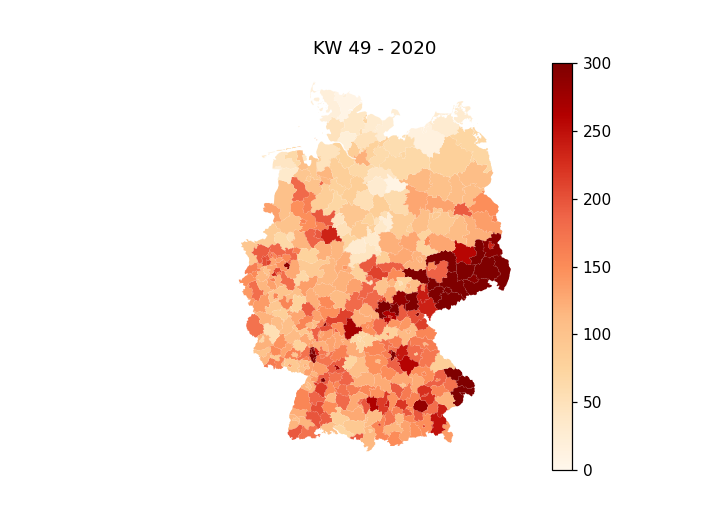

In [21]:
%matplotlib notebook

# Daten
one_kw = geotemp_data_df.xs((2020, 49)) # Eine Kalenderwoche (KW)
one_kw_geo_df = pd.concat([one_kw, landkreise_geo_df], axis=1)
one_kw_geo_df = geopandas.GeoDataFrame(one_kw_geo_df)

# Geo Plot
one_kw_geo_df.plot(column='SiebenTageInzidenz', legend=True, cmap='OrRd', norm=plt.Normalize(vmin=0, vmax=300))
plt.title('KW 49 - 2020')
plt.axis('off')
plt.savefig("visualization/one_kw_geo.svg")

Exemplarisch zeigt die Karte die 7-Tage Inzidenz der 401 Landkreise am Ende der Kalenderwoche 49. Nach gleichem Prinzip haben wir eine gif-Datei erstellt, welches den Pandemieverlauf vom 01. März 2020 bis zum 31. März 2021 veranschaulicht:

![7TageInzidenz](visualization/gif_jpg_OrRd_300.gif)

Neben den bereits angesprochenen 'Wellen' werden auch räumliche Unterschiede deutlich. Hohe Inzidenzwerte scheinen sich dabei über die Grenzen zu benachbarten Landkreisen auszubreiten. Oft wurde von sogenannten 'Corona-Hotspots' berichtet.

Die Erkentnisse der Datenexploration sollen in den nächsten Notebooks genutzt werden, um die Eignung potenzieller Modelle zur Vorhersage einschätzen zu können. Die modifizierten Geodaten sollen dazu exportiert werden:

In [22]:
landkreise_geo_df.to_pickle(r'data/landkreise_geo.pkl')
geotemp_data_df.to_pickle(r'data/geotemp_data.pkl')